### 1. **Data Loading**


In [ ]:
pip install pandas numpy tensorflow scikit-learn nltk seaborn matplotlib wordcloud joblib

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
import joblib

# Download NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

                                 Product Description  Price Range
0  -1 meter type c to c cable fast charging cable...            1
1  -High performance Micro USB 3.0 hard disk cabl...            1
2  -Make delicious milk foam creamer for your dri...            0
3  -mini usb cable is easy to plug and play conne...            1
4  ?Top Technology----8K@60HZ HDMI Cable? This 8K...            1
Columns in dataset: Index(['Product Description', 'Price Range'], dtype='object')


<ipython-input-56-3a0280219213>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Price Range"].fillna(0, inplace=True)  # Replace NaN with 0
<ipython-input-56-3a0280219213>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Price Range", data=df, palette="viridis")


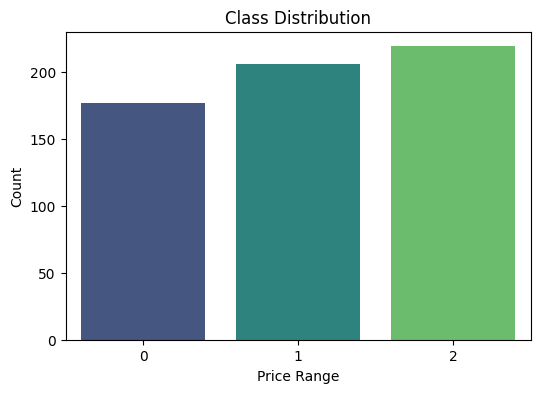

In [ ]:
file_path = "/content/NLP_dataset_11 - Sheet1.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())
print("Columns in dataset:", df.columns)

# Convert to integer and replace invalid values
df["Price Range"] = pd.to_numeric(df["Price Range"], errors="coerce")  # Convert to numeric, replace errors with NaN
df["Price Range"].fillna(0, inplace=True)  # Replace NaN with 0
df["Price Range"] = df["Price Range"].astype(int)  # Ensure it's an integer column


plt.figure(figsize=(6, 4))
sns.countplot(x="Price Range", data=df, palette="viridis")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()



### 2. **Text Processing**


In [ ]:
import nltk
nltk.download('punkt_tab')

import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    if pd.isna(text):
        return ""
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]  # Lemmatization & stopword removal
    return " ".join(tokens)

# Load dataset
file_path = "/content/NLP_dataset_11 - Sheet1.csv"
df = pd.read_csv(file_path)

if "Product Description" not in df.columns:
    print("Error: 'Product Description' column not found in the dataset!")
else:
    # Apply preprocessing
    df["Processed_title"] = df["Product Description"].astype(str).apply(preprocess_text)
    print(df[["Product Description", "Processed_title"]].head())





[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                 Product Description  \
0  -1 meter type c to c cable fast charging cable...   
1  -High performance Micro USB 3.0 hard disk cabl...   
2  -Make delicious milk foam creamer for your dri...   
3  -mini usb cable is easy to plug and play conne...   
4  ?Top Technology----8K@60HZ HDMI Cable? This 8K...   

                                     Processed_title  
0  meter type c c cable fast charging cable conve...  
1  performance micro usb hard disk cable connects...  
2  delicious milk foam creamer drink home without...  
3  usb cable easy plug play connection digital ca...  
4  top technology hdmi cable hdmi cable us techno...  


### 3. **Text Embedding**


In [ ]:
print(df.columns)  # Check all column names
print(df.head())   # Inspect the first few rows


Index(['Product Description', 'Price Range', 'Processed_title'], dtype='object')
                                 Product Description  Price Range  \
0  -1 meter type c to c cable fast charging cable...            1   
1  -High performance Micro USB 3.0 hard disk cabl...            1   
2  -Make delicious milk foam creamer for your dri...            0   
3  -mini usb cable is easy to plug and play conne...            1   
4  ?Top Technology----8K@60HZ HDMI Cable? This 8K...            1   

                                     Processed_title  
0  meter type c c cable fast charging cable conve...  
1  performance micro usb hard disk cable connects...  
2  delicious milk foam creamer drink home without...  
3  usb cable easy plug play connection digital ca...  
4  top technology hdmi cable hdmi cable us techno...  


In [ ]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

import numpy as np
from tensorflow.keras.utils import to_categorical

# Convert labels to integer type
train_labels = np.array(train_data["Price Range"], dtype=np.int32)
val_labels = np.array(val_data["Price Range"], dtype=np.int32)
test_labels = np.array(test_data["Price Range"], dtype=np.int32)

# Replace invalid values (-9223372036854775808) with a valid class (e.g., 0)
test_labels = np.where(test_labels < 0, 0, test_labels)

# Verify the fix
print("Unique values after fix:", np.unique(test_labels))



Unique values after fix: [0 1 2]


In [ ]:
y_train = to_categorical(train_labels, num_classes=3)
y_val = to_categorical(val_labels, num_classes=3)
y_test = to_categorical(test_labels, num_classes=3)

print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of y_train: (421, 3)
Shape of y_val: (90, 3)
Shape of y_test: (91, 3)


In [ ]:
print(train_data['Processed_title'].tolist()[:20])  # Show first 20 processed titles


['frothes milk used cold hot aa use clean easy convenient operate', 'bar soundbar powerful dual driver subwoofer deliver cinematic experience right soundbar come option like enjoy wireless streaming via bt mode choose others like usb aux hdmi coaxial soundbar come led display control fully functional remote power rms subwoofer wattssoundbar watt total sizesubwoofer x bar x response input coaxial hdmi arc max supported memory size usb name bar version', 'simply draw color clip pen together construct interesting ink last ink', 'resolution ultra hd x refresh rate hertz degree wide viewing hdmi port connect set top box blu ray player gaming console usb port connect hard drive usb watt output open baffle dolby audio clear tv feature google tv watchlist voice search google play chromecast netflix amazon prime video additional feature apple airplay apple homekit processor hdr live x reality pro motion flow information year warranty provided manufacture date brand contact installation product 

In [ ]:
!pip install gensim

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
# Access the correct column name 'Processed_title'
X_train_bow = bow_vectorizer.fit_transform(train_data['Processed_title']).toarray() # Changed column name to 'Processed_title'
X_val_bow = bow_vectorizer.transform(val_data['Processed_title']).toarray() # Changed column name to 'Processed_title'
X_test_bow = bow_vectorizer.transform(test_data['Processed_title']).toarray() # Changed column name to 'Processed_title'

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# Access the correct column name 'Processed_title'
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Processed_title']).toarray() # Changed column name to 'Processed_title'
X_val_tfidf = tfidf_vectorizer.transform(val_data['Processed_title']).toarray() # Changed column name to 'Processed_title'
X_test_tfidf = tfidf_vectorizer.transform(test_data['Processed_title']).toarray() # Changed column name to 'Processed_title'

# FastText (Word Embeddings)
# Access the correct column name 'Processed_title'
fasttext_model = gensim.models.FastText(train_data['Processed_title'].apply(str.split), vector_size=100, window=5, min_count=5) # Changed column name to 'Processed_title'
X_train_fasttext = [fasttext_model.wv[text.split()] for text in train_data['Processed_title']] # Changed column name to 'Processed_title'
X_val_fasttext = [fasttext_model.wv[text.split()] for text in val_data['Processed_title']] # Changed column name to 'Processed_title'
X_test_fasttext = [fasttext_model.wv[text.split()] for text in test_data['Processed_title']] # Changed column name to 'Processed_title'


print("Embedding completed for BoW, TF-IDF, and FastText.")

Embedding completed for BoW, TF-IDF, and FastText.


### 4. **Model Training with Different Architectures**


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convert to a standard NumPy int array
train_labels = np.array(train_data["Price Range"], dtype=np.int32)
val_labels = np.array(val_data["Price Range"], dtype=np.int32)
test_labels = np.array(test_data["Price Range"], dtype=np.int32)

# Now apply one-hot encoding
y_train = to_categorical(train_labels, num_classes=3)
y_val = to_categorical(val_labels, num_classes=3)



In [ ]:
# Replace invalid values (-2147483648) with a valid class (e.g., 0)
test_labels = np.where(test_labels == -2147483648, 0, test_labels)

# Verify the fix
print("Unique values after fix:", np.unique(test_labels))
y_test = to_categorical(test_labels, num_classes=3)



Unique values after fix: [0 1 2]


In [ ]:
print("Unique values in train_data:", np.unique(train_data['Price Range']))
print("Unique values in val_data:", np.unique(val_data['Price Range']))
print("Unique values in test_data:", np.unique(test_data['Price Range']))


Unique values in train_data: [0 1 2]
Unique values in val_data: [0 1 2]
Unique values in test_data: [0 1 2]


In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(train_data['Price Range'], num_classes=3)
y_val = to_categorical(val_data['Price Range'], num_classes=3)
y_test = to_categorical(test_data['Price Range'], num_classes=3)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Bidirectional, Embedding, Flatten

# Define a CNN model
def cnn_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # CHANGED HERE
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # CHANGED HERE
    return model


# Define an LSTM model
def lstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))  # CHANGED HERE
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # CHANGED HERE
    return model


# Define a CNN-BiLSTM model
def cnn_bilstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(3, activation='softmax'))  # CHANGED HERE
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # CHANGED HERE
    return model

# Ensure labels are correctly one-hot encoded before training
input_dim = 5000

cnn = cnn_model(input_dim)
cnn.fit(X_train_bow, y_train, validation_data=(X_val_bow, y_val), epochs=5, batch_size=64)

lstm = lstm_model(input_dim)
lstm.fit(X_train_bow, y_train, validation_data=(X_val_bow, y_val), epochs=5, batch_size=64)

bilstm = cnn_bilstm_model(input_dim)
bilstm.fit(X_train_bow, y_train, validation_data=(X_val_bow, y_val), epochs=5, batch_size=64)




Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 550ms/step - accuracy: 0.3850 - loss: 1.2413 - val_accuracy: 0.5333 - val_loss: 0.9791
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.5411 - loss: 0.9690 - val_accuracy: 0.6000 - val_loss: 0.8456
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7294 - loss: 0.6892 - val_accuracy: 0.8333 - val_loss: 0.5147
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8811 - loss: 0.3164 - val_accuracy: 0.8333 - val_loss: 0.3830
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9615 - loss: 0.1358 - val_accuracy: 0.8667 - val_loss: 0.4291
Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 89s 12s/step - accuracy: 0.3347 - loss: 1.0962 - val_accuracy: 0.3556 - val_loss: 1.1023
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 140s 12s/step - accuracy: 0.3810 - loss: 1.1065 - val_accuracy: 0.3556 - val_loss: 1.0974
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 140s 12s/step - accuracy: 0.4005 - loss: 1.0905 - val_accuracy: 0.3556 - val_loss: 1.0966
Epoch 4/5
7/7 ━

### 5. **Comparative Analysis of Models**


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np  # Import NumPy for argmax()

# Predict on test data
y_pred_cnn = cnn.predict(X_test_bow)
y_pred_lstm = lstm_model(input_dim).predict(X_test_bow)
y_pred_cnn_bilstm = cnn_bilstm_model(input_dim).predict(X_test_bow)

# Convert one-hot encoded predictions to class labels
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
y_pred_cnn_bilstm_classes = np.argmax(y_pred_cnn_bilstm, axis=1)

# Calculate accuracy and classification report
cnn_acc = accuracy_score(test_data['Price Range'], y_pred_cnn_classes)
print("CNN Accuracy:", cnn_acc)
print("CNN Classification Report:\n", classification_report(test_data['Price Range'], y_pred_cnn_classes))

lstm_acc = accuracy_score(test_data['Price Range'], y_pred_lstm_classes)
print("LSTM Accuracy:", lstm_acc)
print("LSTM Classification Report:\n", classification_report(test_data['Price Range'], y_pred_lstm_classes))

bilstm_acc = accuracy_score(test_data['Price Range'], y_pred_cnn_bilstm_classes)
print("CNN-BiLSTM Accuracy:", bilstm_acc)
print("CNN-BiLSTM Classification Report:\n", classification_report(test_data['Price Range'], y_pred_cnn_bilstm_classes))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step
CNN Accuracy: 0.8681318681318682
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84        34
           1       0.83      0.83      0.83        36
           2       0.95      1.00      0.98        21

    accuracy                           0.87        91
   macro avg       0.88      0.89      0.88        91
weighted avg       0.87      0.87      0.87        91

LSTM Accuracy: 0.3956043956043956
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.40      1.00      0.57        36
           2       0.00      0.00      0.00        21

    accuracy                           0.40        91
   macro avg       0.13      0.33      0.19        91
weighted avg       0.16      0.40      0.22        91

CNN-

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

### 6. **Saving the Best Model**

In [ ]:
cnn.save('best_text_classification_model.h5')
print("Best model saved as 'best_text_classification_model.h5'")

Best model saved as 'best_text_classification_model.h5'


### 7. **Prediction on Real-World Input**


In [ ]:
# Load the saved model
from keras.models import load_model
model = load_model('best_text_classification_model.h5')

# Real-world input
new_text = "21.5 Inch VA Panel Full HD 1920 X 1080 Resolution Monitor I 250 Nits Brightness I 178 / 178 View Angle|Connectivity Options : HDMI and VGA Ports with Inbox HDMI Cable|5MS Response Time 75Hz Fast Refresh Rate|Eye Care Featues Includes Bluelight Shield I Flickerless I Comfyview|Wall Mount Ready I -5 to -20 Tilt Adjustment"
processed_text = preprocess_text(new_text)
input_data = bow_vectorizer.transform([processed_text]).toarray()

# Predicting the class of new text
predicted_class = model.predict(input_data).round()
import numpy as np

# Convert one-hot encoded prediction to class label
predicted_label = np.argmax(predicted_class)

if(predicted_label == 0):
  print(f"Predicted Class Label: Low")
elif(predicted_label == 1):
  print(f"Predicted Class Label: Medium")
else :
  print(f"Predicted Class Label: High")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Predicted Class Label: High
